
<a href="https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Exercises/E05_KNN.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# K-Nearest Neighbor classification (KNN) exercises 

---
These are introductory exercises in Machine learning with focus in **KNN**, but also an introductory exercise in computer vision.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. MNIST data (*)

In the whole exercise, we will work with the famous MNIST dataset. Start by installing ```tensorflow``` to your pipenv if you haven't already. Import ```keras``` from tensorflow and load the dataset using ```keras.mnist.load_data()```.

&nbsp; a) Check help() on ```keras.mnist.load_data``` and read to find out how to unpack the data properly. 

&nbsp; b) Check the shapes of X_train, X_test, y_train, y_test. What does each dimension mean?

&nbsp; c) How many images are there in X_train?

&nbsp; d) Check smallest and largest value of a sample image of your choice. What do these numbers in the matrix represent? Plot this image using ```plt.imshow()``` and set cmap to "gray" to get the correct representation of the grayscale image.

&nbsp; e) Plot 20 sample images. 

&nbsp; f) When you checked the shapes of the data you noticed that X_train, X_test are 3D tensors (generalization of a matrix to more dimensions). However KNN classifier in scikit-learn requires a 2D tensor or a matrix. Reshape X_train and X_test to appropriate shapes. 

<details>

<summary>Hint</summary>

e) A vector or a 1D array can represent one image. 

</details>

<details>

<summary>Answer</summary>

d) 0 and 255. It's grayscale images of 28x28 pixels, where the higher the value, the larger pixel intensity.

<img src = "../assets/MNIST_samples.png" height=100>

e) Shape: X_train: (60000, 784), X_test: (10000, 784)

</details>

---

In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

a) Check help() on ```keras.mnist.load_data``` and read to find out how to unpack the data properly. 


In [ ]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

b) Check the shapes of X_train, X_test, y_train, y_test. What does each dimension mean?

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at [the MNIST homepage][link].

[link]: http://yann.lecun.com/exdb/mnist/

Returns
Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

- x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

- y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

- x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

- y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

c) How many images are there in X_train?

In [10]:
print(f'There are {X_train.shape[0]} images in X_train')

There are 60000 images in X_train


d) Check smallest and largest value of a sample image of your choice. What do these numbers in the matrix represent? Plot this image using ```plt.imshow()``` and set cmap to "gray" to get the correct representation of the grayscale image.

In [22]:
print(X_train[0].min()) 
print(X_train[0].max()) 

0
255


A value 0 in the matrix stands for the darkest black and 255 stands for the lightest white. Values inbetween of 0 and 255 stands for different shades of gray

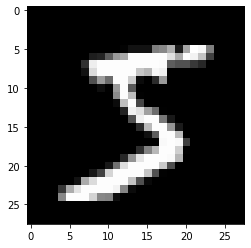

In [24]:
plt.imshow(X_train[0], cmap='gray')

e) Plot 20 sample images.

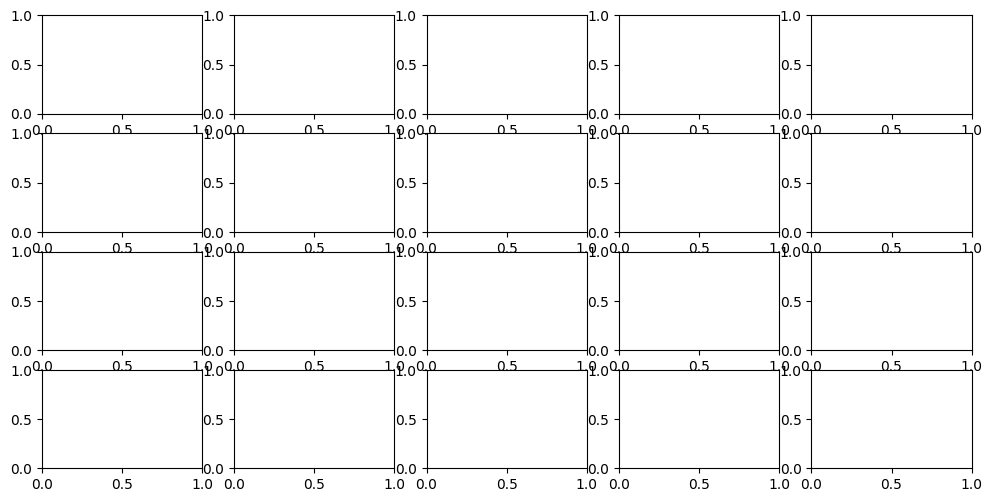

In [25]:
fig, axes = plt.subplots(4,5, figsize=(12,6), dpi=100)

In [26]:
axes.flatten()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

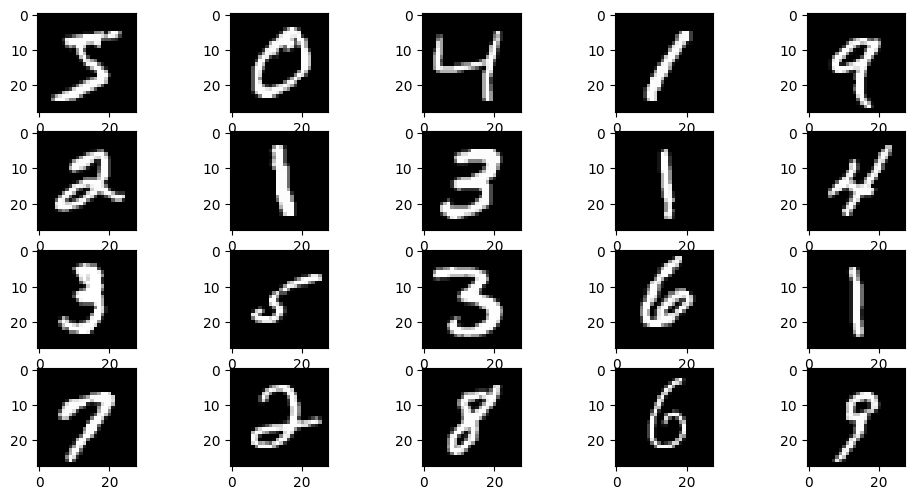

In [27]:
fig, axes = plt.subplots(4,5, figsize=(12,6), dpi=100)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], cmap='gray')
    

f) When you checked the shapes of the data you noticed that X_train, X_test are 3D tensors (generalization of a matrix to more dimensions). However KNN classifier in scikit-learn requires a 2D tensor or a matrix. Reshape X_train and X_test to appropriate shapes.

In [28]:
X_train = np.reshape(X_train, (60000, 28*28))
X_test = np.reshape(X_test, (10000, 28*28))
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 1. Train|test|validation split (*)

As you already have training data and testing data, do a split on the training data to get validation data. The validation data will be used for tuning $k$ number of neighbors for KNN. I used 0.16 for validation as it is close to 1/6 to get around 10000 validation samples.

---

In [30]:
from sklearn.model_selection import train_test_split
X_train_without_val, X_val, y_train_without_val, y_val = train_test_split(X_train, y_train, test_size=0.16, random_state=42)
# the test_size is actually the percentage of validation data
X_train_without_val.shape, X_val.shape, y_train_without_val.shape, y_val.shape

((50400, 784), (9600, 784), (50400,), (9600,))

## 2. Hyperparameter tuning (*)

Train the models for a set of $k$-values using the training data and make predictions on validation data. Plot the validation accuracy against different $k$-values. Based on your plot, which $k$ do you choose? 

<details>

<summary>Answer</summary>

<img src = "../assets/Tune k in KNN MNIST.png" height=300>

</details>

---

In [37]:
X_train_without_val.shape, y_train_without_val.shape

((50400, 784), (50400,))

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc_score = []

for k in range(1,5):
    model_KNN=KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(X_train_without_val, y_train_without_val)
    y_pred = model_KNN.predict(X_val)
    acc_score.append(accuracy_score(y_pred, y_val))

acc_score

[0.9751041666666667, 0.9639583333333334, 0.9727083333333333, 0.9715625]

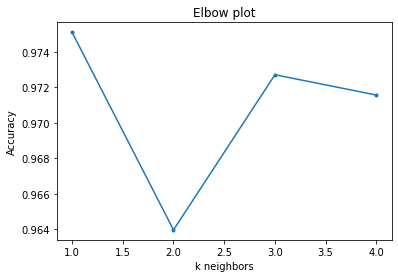

In [42]:
fig, ax = plt.figure(), plt.axes()
ax.plot(range(1, len(acc_score)+1), acc_score, ".-")
ax.set(title='Elbow plot', xlabel='k neighbors', ylabel='Accuracy');

When k=1, the accuracy level is the highest. I therefore choose k=1

## 3. Train and predict (*)

Now train the KNN model using the $k$ value you have chosen. Don't waste any training samples, so use all the original 60000 of the X_train for training the KNN model. Predict on the test data. 

&nbsp; a) Do a classification report and based on the report, can you figure out which number had highest proportions of false negatives. False negative in this case means that the true label is $i$ but the model predicted not $i$.  

&nbsp; b) Plot a confusion matrix, does this confirm your answer in a?

&nbsp; c) Compute the number of misclassifications for each number. Which number had most misclassifications, do you have any suggestions on why this would be the case?

<details>

<summary>Answer</summary>

c) 

Total test sample consist of 10000 digits

True label 0, algorithm misclassified 8 of those

True label 1, algorithm misclassified 5 of those

True label 2, algorithm misclassified 58 of those

True label 3, algorithm misclassified 33 of those

True label 4, algorithm misclassified 48 of those

True label 5, algorithm misclassified 30 of those

True label 6, algorithm misclassified 16 of those

True label 7, algorithm misclassified 46 of those

True label 8, algorithm misclassified 61 of those

True label 9, algorithm misclassified 49 of those

</details>

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [45]:
model_KNN=KNeighborsClassifier(n_neighbors=1)
model_KNN.fit(X_train, y_train)
y_pred=model_KNN.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



$ rec = \frac{TP}{TP+FN}$

If rec is high, then FN is small. 
I thereby find that the number of 8 has a high level of rec, and also a low level of FN false negative.

b) Plot a confusion matrix, does this confirm your answer in a?

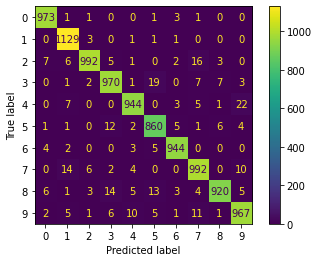

In [48]:
cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

Yes, it confirms my choice in a). The number of 8 has 6 samples predicted as 0, and 14 samples predicted as 3, and 13 samples predicted as 5 etc. It is more times than the number of 7 and 9 etc.

c) Compute the number of misclassifications for each number. Which number had most misclassifications, do you have any suggestions on why this would be the case?

In [50]:
cm

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1129,    3,    0,    1,    1,    1,    0,    0,    0],
       [   7,    6,  992,    5,    1,    0,    2,   16,    3,    0],
       [   0,    1,    2,  970,    1,   19,    0,    7,    7,    3],
       [   0,    7,    0,    0,  944,    0,    3,    5,    1,   22],
       [   1,    1,    0,   12,    2,  860,    5,    1,    6,    4],
       [   4,    2,    0,    0,    3,    5,  944,    0,    0,    0],
       [   0,   14,    6,    2,    4,    0,    0,  992,    0,   10],
       [   6,    1,    3,   14,    5,   13,    3,    4,  920,    5],
       [   2,    5,    1,    6,   10,    5,    1,   11,    1,  967]],
      dtype=int64)

In [52]:
cm[0].sum()

980

In [54]:
cm[0,0]

973

In [56]:
for row in range(10):
    print(f'The true number of {row} was missclassified {cm[row].sum()-cm[row,row]} times')

The true number of 0 was missclassified 7 times
The true number of 1 was missclassified 6 times
The true number of 2 was missclassified 40 times
The true number of 3 was missclassified 40 times
The true number of 4 was missclassified 38 times
The true number of 5 was missclassified 32 times
The true number of 6 was missclassified 14 times
The true number of 7 was missclassified 36 times
The true number of 8 was missclassified 54 times
The true number of 9 was missclassified 42 times


The true number of 8 was missclassified more times than other numbers. That is because probably 8 looks similar to 0, 6, 9.

---
## 4. Predict your own handwriting (**)

Use a software of your choice to draw a digit, make sure the image size is 28x28 pixels or you have to downscale it. You could also take a photo of a handwritten image, if you scale it properly. Read your image using ```matplotlib.image.imread()```. You will have to convert it into grayscale and scale it to be in same scale as the dataset your model has been trained on. Predict on your digit, was it correct? If not, what could the reason be, and is there something that could be done on preprocessing your image? 